In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import missingno as msno
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

In [2]:
train_f = "../input/chexpert-v10-small/CheXpert-v1.0-small/train.csv"
valid_f = "../input/chexpert-v10-small/CheXpert-v1.0-small/valid.csv"

In [3]:
train_df = pd.read_csv(train_f)
valid_df =pd.read_csv(valid_f)

In [4]:
train_df.shape

(223414, 19)

In [5]:
valid_df.shape

(234, 19)

In [6]:
train_df.describe()

Age  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
count  223414.000000     22381.0                44839.000000  46203.000000   
mean       60.430653         1.0                   -0.035795      0.409346   
std        17.820925         0.0                    0.718442      0.769323   
min         0.000000         1.0                   -1.000000     -1.000000   
25%        49.000000         1.0                   -1.000000      0.000000   
50%        62.000000         1.0                    0.000000      1.000000   
75%        74.000000         1.0                    0.000000      1.000000   
max        90.000000         1.0                    1.000000      1.000000   

        Lung Opacity   Lung Lesion         Edema  Consolidation     Pneumonia  \
count  117778.000000  11944.000000  85956.000000   70622.000000  27608.000000   
mean        0.848911      0.644508      0.456769      -0.183498     -0.461134   
std         0.472571      0.691607      0.741785       0.753980      0.828249   
min        -1.000000     -1.000000     -1.000000      -1.000000     -1.000000   
25%         1.000000      1.000000      0.000000      -1.000000     -1.000000   
50%         1.000000      1.000000      1.000000       0.000000     -1.000000   
75%         1.000000      1.000000      1.000000       0.000000      0.000000   
max         1.000000      1.000000      1.000000       1.000000      1.000000   

        Atelectasis  Pneumothorax  Pleural Effusion  Pleural Other  \
count  68443.000000  78934.000000     133211.000000    6492.000000   
mean      -0.005304      0.206540          0.559706       0.134011   
std        0.990244      0.493529          0.648859       0.966183   
min       -1.000000     -1.000000         -1.000000      -1.000000   
25%       -1.000000      0.000000          0.000000      -1.000000   
50%        0.000000      0.000000          1.000000       1.000000   
75%        1.000000      0.000000          1.000000       1.000000   
max        1.000000      1.000000          1.000000       1.000000   

           Fracture  Support Devices  
count  12194.000000    123217.000000  
mean       0.688699         0.932680  
std        0.565435         0.283377  
min       -1.000000        -1.000000  
25%        0.000000         1.000000  
50%        1.000000         1.000000  
75%        1.000000         1.000000  
max        1.000000         1.000000

In [7]:
im = Image.open('../input/chexpert-v10-small/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg')
#im.size
im.show()

In [8]:
def drop_col(df,col,ax):    
    return df.drop(col,axis=ax)
def fill_na(df):
    return df.fillna(0)

In [9]:
train_df = drop_col(train_df,'AP/PA',1)
valid_df = drop_col(valid_df,'AP/PA',1)

In [10]:
train_df = fill_na(train_df)
valid_df = fill_na(valid_df)

<AxesSubplot:>

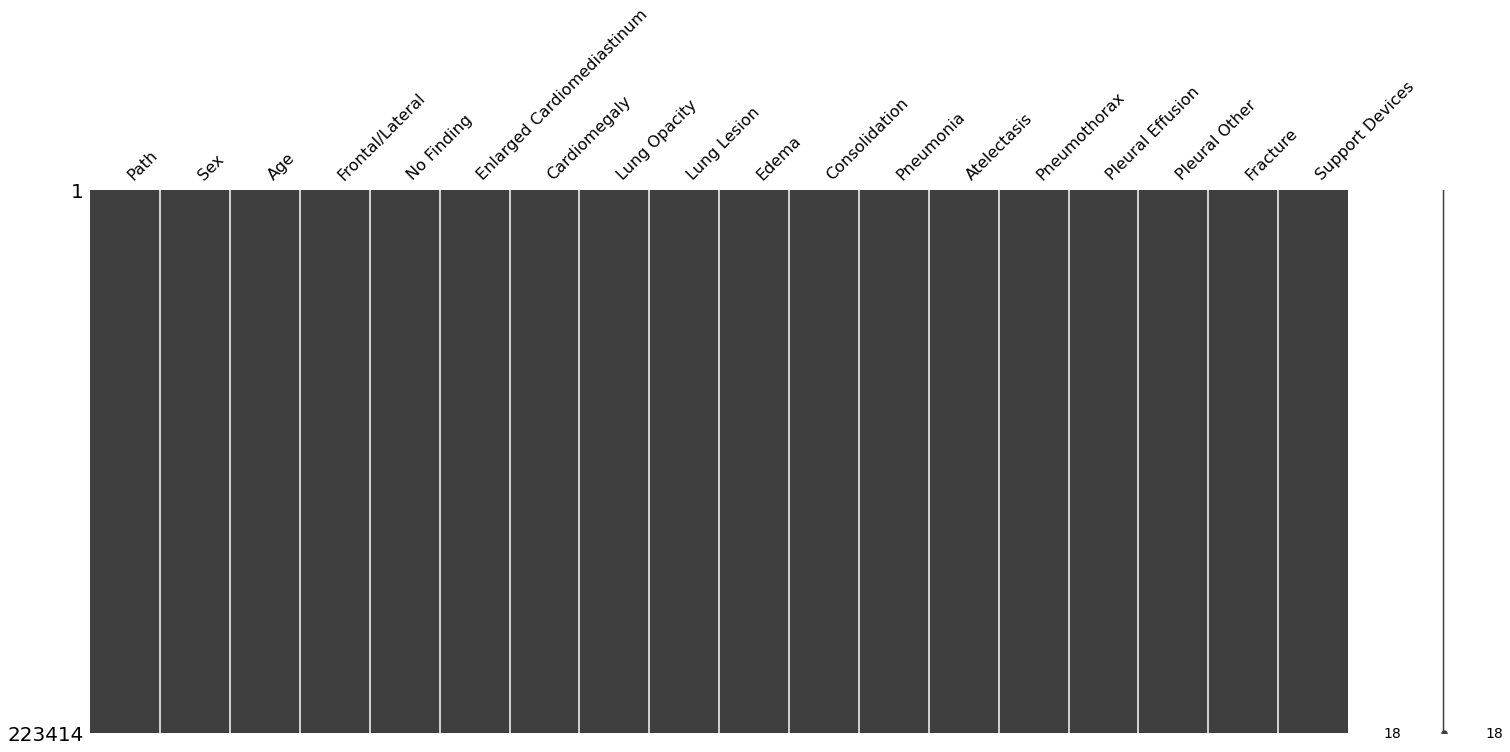

In [11]:
msno.matrix(train_df)

In [12]:
train_df.Path = r'../input/chexpert-v10-small/' + train_df.Path
valid_df.Path = r'../input/chexpert-v10-small/' + valid_df.Path

In [13]:
train_df =train_df.replace(-1,0)
valid_df = valid_df.replace(-1,0)

In [14]:
train_df.head()

Path     Sex  Age  \
0  ../input/chexpert-v10-small/CheXpert-v1.0-smal...  Female   68   
1  ../input/chexpert-v10-small/CheXpert-v1.0-smal...  Female   87   
2  ../input/chexpert-v10-small/CheXpert-v1.0-smal...  Female   83   
3  ../input/chexpert-v10-small/CheXpert-v1.0-smal...  Female   83   
4  ../input/chexpert-v10-small/CheXpert-v1.0-smal...    Male   41   

  Frontal/Lateral  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal         1.0                         0.0           0.0   
1         Frontal         0.0                         0.0           0.0   
2         Frontal         0.0                         0.0           0.0   
3         Lateral         0.0                         0.0           0.0   
4         Frontal         0.0                         0.0           0.0   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           0.0          0.0    0.0            0.0        0.0          0.0   
1           1.0          0.0    0.0            0.0        0.0          0.0   
2           1.0          0.0    0.0            0.0        0.0          0.0   
3           1.0          0.0    0.0            0.0        0.0          0.0   
4           0.0          0.0    1.0            0.0        0.0          0.0   

   Pneumothorax  Pleural Effusion  Pleural Other  Fracture  Support Devices  
0           0.0               0.0            0.0       0.0              1.0  
1           0.0               0.0            0.0       1.0              0.0  
2           0.0               0.0            0.0       1.0              0.0  
3           0.0               0.0            0.0       1.0              0.0  
4           0.0               0.0            0.0       0.0              0.0

In [15]:
train_df.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

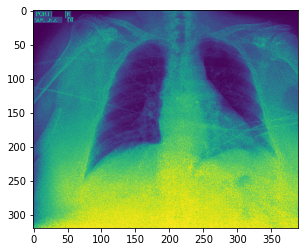

In [16]:
pil_im = Image.open(train_df['Path'][0],'r')
imshow(np.asarray(pil_im))

In [17]:
img_size = pil_im.size

In [18]:
classes = list(train_df.columns[4:])

In [19]:
from sklearn.model_selection import train_test_split

final_train,final_test = train_test_split(train_df[:int(len(train_df)/2)],
                                         test_size = 0.2,
                                         random_state = 2001
                                         )

In [20]:
print(f"Training set size {final_train.shape}")
print(f"Testing set size {final_test.shape}")

Training set size (89365, 18)
Testing set size (22342, 18)


In [21]:
from keras_preprocessing.image import ImageDataGenerator
base_generator = ImageDataGenerator(rescale = 1./255)

In [22]:
"""
flow_from_dataframe:
    Parameters:
    ----------------------
    image_generator : image generator for modifying the training data using data augmentation
    dataframe : the dataframe which will be used in the image generator
    batch_size : the number of images the model will recieve simultaneously. Increasing this can require more compute resources
"""

'\nflow_from_dataframe:\n    Parameters:\n    ----------------------\n    image_generator : image generator for modifying the training data using data augmentation\n    dataframe : the dataframe which will be used in the image generator\n    batch_size : the number of images the model will recieve simultaneously. Increasing this can require more compute resources\n'

In [23]:
def flow_from_dataframe(image_generator, dataframe, batch_size):
    return image_generator.flow_from_dataframe(dataframe,
                                                x_col = 'Path',
                                                y_col = classes,
                                                target_size = img_size,
                                                classes = classes,
                                                color_mode = 'rgb',
                                                class_mode = 'raw',
                                                shuffle = False,
                                                batch_size = batch_size
                                                )

In [24]:
train_gen = flow_from_dataframe(image_generator = base_generator,
                                dataframe = final_train,
                               batch_size = 32
                               )
valid_gen = flow_from_dataframe(image_generator = base_generator,
                               dataframe = valid_df,
                               batch_size = 32
                               )
test_gen = flow_from_dataframe(image_generator = base_generator,
                                dataframe = final_test,
                               batch_size = 32
                               )

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 89365 validated image filenames.
Found 234 validated image filenames.
Found 22342 validated image filenames.


In [25]:
train_x, train_y = next(train_gen)
print(f'Image dimensions: {train_x[1].shape}')
print(f'disease vector:{train_y[1]} \n disease vector size:{len(train_y[1])}')

Image dimensions: (389, 320, 3)
disease vector:[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 disease vector size:14


['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


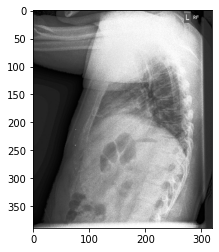

In [26]:
pil_im = Image.open(final_train['Path'][1],'r')
imshow(train_x[1])
pil_im.size
print(classes)
print(train_y[1])

In [27]:
from keras.layers import Input
from tensorflow.keras.applications import DenseNet121
from keras.layers.core import Dense
from keras.models import Model

In [28]:
input_shape = train_x[1].shape

img_input = Input(shape = input_shape)

b_model = DenseNet121(include_top = False,
                   input_tensor = img_input,
                   input_shape = input_shape,
                   pooling = "max",
                   weights = "imagenet"
                   )
x= b_model.output
predictions = Dense(len(classes),
                   activation = "sigmoid",
                   name = "predictions")(x)
model = Model(inputs = img_input,
             outputs = predictions
             )

29089792/29084464 [==============================] - 1s 0us/step


In [29]:
from keras.utils.vis_utils import plot_model

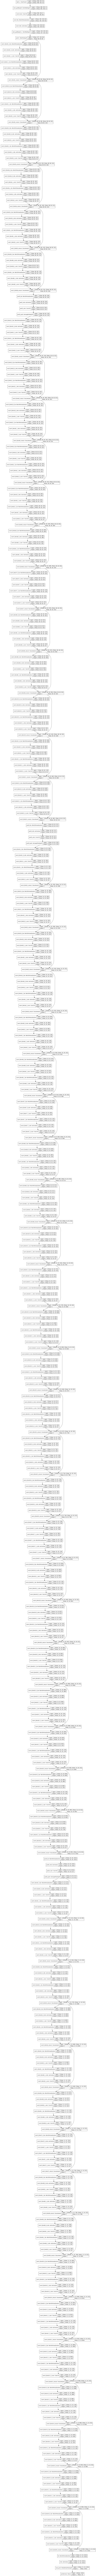

In [30]:
plot_model(model,show_shapes=True)

In [31]:
from keras.callbacks import ModelCheckpoint

In [32]:
model_train = model
output_weights = 'weights.h5'

checkpoint = ModelCheckpoint(output_weights,
                            save_weights_only = True,
                            save_best_only = True,
                            verbose=1
                            )

In [33]:
import keras.backend as kb
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
import shutil
import warnings
import json

In [34]:
"""
MultipleClassAUROC:
    __init__:
        Parameters:
            generator: image generator
            class_names: output classes
            weights_path : path to the file "weights.h5" which has optimized weights stored
            stats: model stats
    on_epoch_end:
        Task:            
            Calculate the average of the ROC Curves and save the best group of weights
            according to metric.
"""

'\nMultipleClassAUROC:\n    __init__:\n        Parameters:\n            generator: image generator\n            class_names: output classes\n            weights_path : path to the file "weights.h5" which has optimized weights stored\n            stats: model stats\n    on_epoch_end:\n        Task:            \n            Calculate the average of the ROC Curves and save the best group of weights\n            according to metric.\n'

In [35]:
class MultipleClassAUROC(Callback):
    def __init__(self, generator, class_names, weights_path,stats = None):
        super(Callback, self).__init__()
        self.generator = generator
        self.class_names = class_names
        self.weights_path = weights_path
        self.best_weights_path = os.path.join(os.path.split(weights_path)[0],
                                              f"best_{os.path.split(weights_path)[1]}"
                                             )
        self.best_auroc_log_path = os.path.join(os.path.split(weights_path)[0],
                                                "best_auroc.log"
                                               )
        self.stats_output_path = os.path.join(os.path.split(weights_path)[0],
                                              ".training_stats.json"
                                             )
        if stats:
            self.stats = stats
        else:
            self.stats = {"best_mean_auroc":0}
        
        self.auroc = {}
        for c in self.class_names:
            self.auroc[c]=[]
    
    #------------------------------------------------------------------------------------#
    
    def on_epoch_end(self, epoch, logs ={}):
        print("\n-----------------------")
        self.stats['lr'] = float(kb.eval(self.model.optimizer.lr))
        print(f"Learning Rate actual: {self.stats['lr']}")
        
        y_hat = self.model.predict_generator(self.generator,steps=self.generator.n/self.generator.batch_size)
        y = self.generator.labels
        
        print(f"*** epoch#{epoch + 1} Training phase ROC curves ***")
        current_auroc = []
        
        for i in range(len(self.class_names)):
            try:
                score = roc_auc_score(y[:, i], y_hat[:, i])
            except ValueError:
                score = 0
            self.auroc[self.class_names[i]].append(score)
            current_auroc.append(score)
            print(f"{i+1}. {self.class_names[i]}: {score}")
        print("*********************************")
        
        mean_auroc = np.mean(current_auroc)
        print(f'Avg. ROC Curve: {mean_auroc}')
        
        if(mean_auroc>self.stats["best_mean_auroc"]):
            print(f"Updated mean auroc from {self.stats['best_mean_auroc']} to {mean_auroc}")
            shutil.copy(self.weights_path,self.best_weights_path)
            print(f'Updated Log File: {self.best_auroc_log_path}')
            
            with open(self.best_auroc_log_path,'a') as f:
                f.write(f"(epoch#{epoch + 1}) auroc: {mean_auroc}, lr: {self.stats['lr']}\n")
            with open(self.stats_output_path, 'w') as f:
                json.dump(self.stats, f)
            
            print(f"Weights Updated: {self.weights_path} -> {self.best_weights_path}")
            self.stats['best_mean_auroc'] = mean_auroc
            print("-----------------------")
        return
    

In [36]:
import os

In [37]:
training_stats = {}
auroc = MultipleClassAUROC(generator = valid_gen,
                          class_names = classes,
                          weights_path = output_weights,
                          stats = training_stats
                          )

In [38]:
from keras.optimizers import Adam

In [39]:
initial_lr = 1e-3
optimizer = Adam(lr = initial_lr)
model_train.compile(optimizer=optimizer,loss='binary_crossentropy')

In [40]:
from keras.callbacks import TensorBoard, ReduceLROnPlateau

In [41]:
logs_base_dir = '../working/'
patience_reduce_lr = 2
min_lr = 1e-8

callbacks = [checkpoint,
             TensorBoard(log_dir = os.path.join(logs_base_dir,"logs"),
                        batch_size=train_gen.batch_size),
             ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = patience_reduce_lr,
                              verbose = 1,
                              mode = 'min',
                              min_lr = min_lr),
             auroc,
            ]

In [42]:
epochs=20
fit_history = model.fit_generator(
    generator=train_gen,
    steps_per_epoch=train_gen.n/train_gen.batch_size,
    epochs=epochs,
    validation_data=valid_gen,
    validation_steps=valid_gen.n/valid_gen.batch_size,
    callbacks=callbacks,
    shuffle=False
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
2792/2792 [==============================] - 1438s 507ms/step - loss: 0.3670 - val_loss: 0.4220

Epoch 00001: val_loss improved from inf to 0.42197, saving model to weights.h5

-----------------------
Learning Rate actual: 0.0010000000474974513


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#1 Training phase ROC curves ***
1. No Finding: 0.8899033297529537
2. Enlarged Cardiomediastinum: 0.8554862385321101
3. Cardiomegaly: 0.8438164422395464
4. Lung Opacity: 0.8970458553791888
5. Lung Lesion: 0.2618025751072961
6. Edema: 0.8895943562610229
7. Consolidation: 0.8727574249962309
8. Pneumonia: 0.6543141592920354
9. Atelectasis: 0.8084415584415584
10. Pneumothorax: 0.7223451327433629
11. Pleural Effusion: 0.8920368218786308
12. Pleural Other: 0.9012875536480687
13. Fracture: 0
14. Support Devices: 0.8632717639267055
*********************************
Avg. ROC Curve: 0.7394359437284794
Updated mean auroc from 0 to 0.7394359437284794
Updated Log File: best_auroc.log
Weights Updated: weights.h5 -> best_weights.h5
-----------------------
Epoch 2/20
2792/2792 [==============================] - 1202s 430ms/step - loss: 0.3093 - val_loss: 0.3784

Epoch 00002: val_loss improved from 0.42197 to 0.37837, saving model to weights.h5

-----------------------
Learning Rate actual: 0.

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#2 Training phase ROC curves ***
1. No Finding: 0.882921589688507
2. Enlarged Cardiomediastinum: 0.7318899082568808
3. Cardiomegaly: 0.8314138908575479
4. Lung Opacity: 0.8939594356261023
5. Lung Lesion: 0.13733905579399142
6. Edema: 0.8753674309229865
7. Consolidation: 0.8824061510628675
8. Pneumonia: 0.6360619469026548
9. Atelectasis: 0.8065746753246752
10. Pneumothorax: 0.8141592920353983
11. Pleural Effusion: 0.8887300026812048
12. Pleural Other: 0.8197424892703863
13. Fracture: 0
14. Support Devices: 0.8895430127308853
*********************************
Avg. ROC Curve: 0.7207220629395776
Epoch 3/20
2792/2792 [==============================] - 1204s 431ms/step - loss: 0.3005 - val_loss: 0.3981

Epoch 00003: val_loss did not improve from 0.37837

-----------------------
Learning Rate actual: 0.0010000000474974513


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#3 Training phase ROC curves ***
1. No Finding: 0.8904403866809882
2. Enlarged Cardiomediastinum: 0.6915963302752294
3. Cardiomegaly: 0.8307937632884479
4. Lung Opacity: 0.9020429159318047
5. Lung Lesion: 0.0858369098712446
6. Edema: 0.8710170487948266
7. Consolidation: 0.8952208653701192
8. Pneumonia: 0.6310840707964601
9. Atelectasis: 0.814853896103896
10. Pneumothorax: 0.8379424778761062
11. Pleural Effusion: 0.9089284118330503
12. Pleural Other: 0.9914163090128756
13. Fracture: 0
14. Support Devices: 0.8021929501802929
*********************************
Avg. ROC Curve: 0.7252404525725245
Epoch 4/20
2792/2792 [==============================] - 1204s 431ms/step - loss: 0.2922 - val_loss: 0.4069

Epoch 00004: val_loss did not improve from 0.37837

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

-----------------------
Learning Rate actual: 0.00010000000474974513


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#4 Training phase ROC curves ***
1. No Finding: 0.8857411385606874
2. Enlarged Cardiomediastinum: 0.7004770642201835
3. Cardiomegaly: 0.7849043231750531
4. Lung Opacity: 0.8768371546149325
5. Lung Lesion: 0.06437768240343344
6. Edema: 0.862551440329218
7. Consolidation: 0.8502939846223428
8. Pneumonia: 0.5785398230088497
9. Atelectasis: 0.7601461038961039
10. Pneumothorax: 0.8053097345132743
11. Pleural Effusion: 0.9040128697828225
12. Pleural Other: 0.8927038626609443
13. Fracture: 0
14. Support Devices: 0.8445801751416586
*********************************
Avg. ROC Curve: 0.7007482397806789
Epoch 5/20
2792/2792 [==============================] - 1203s 431ms/step - loss: 0.2727 - val_loss: 0.3718

Epoch 00005: val_loss improved from 0.37837 to 0.37179, saving model to weights.h5

-----------------------
Learning Rate actual: 0.00010000000474974513


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#5 Training phase ROC curves ***
1. No Finding: 0.8807733619763696
2. Enlarged Cardiomediastinum: 0.6231192660550459
3. Cardiomegaly: 0.8059000708717222
4. Lung Opacity: 0.9041740152851263
5. Lung Lesion: 0.2103004291845494
6. Edema: 0.915814226925338
7. Consolidation: 0.8997437057138551
8. Pneumonia: 0.6620575221238938
9. Atelectasis: 0.7731331168831169
10. Pneumothorax: 0.7859513274336283
11. Pleural Effusion: 0.9266243632138708
12. Pleural Other: 0.9399141630901288
13. Fracture: 0
14. Support Devices: 0.9559202295974686
*********************************
Avg. ROC Curve: 0.7345304141681509
Epoch 6/20
2792/2792 [==============================] - 1204s 431ms/step - loss: 0.2657 - val_loss: 0.3745

Epoch 00006: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 0.00010000000474974513


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#6 Training phase ROC curves ***
1. No Finding: 0.8717776584317938
2. Enlarged Cardiomediastinum: 0.6267155963302753
3. Cardiomegaly: 0.8058114812189936
4. Lung Opacity: 0.8995443856554968
5. Lung Lesion: 0.1802575107296137
6. Edema: 0.9169900058788948
7. Consolidation: 0.892054877129504
8. Pneumonia: 0.7107300884955753
9. Atelectasis: 0.7554383116883118
10. Pneumothorax: 0.8053097345132743
11. Pleural Effusion: 0.9251943873447135
12. Pleural Other: 0.9313304721030042
13. Fracture: 0
14. Support Devices: 0.9505482375450732
*********************************
Avg. ROC Curve: 0.7336930533617517
Epoch 7/20
2792/2792 [==============================] - 1202s 431ms/step - loss: 0.2603 - val_loss: 0.3785

Epoch 00007: val_loss did not improve from 0.37179

Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

-----------------------
Learning Rate actual: 1.0000000656873453e-05


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#7 Training phase ROC curves ***
1. No Finding: 0.8656015037593985
2. Enlarged Cardiomediastinum: 0.6195229357798164
3. Cardiomegaly: 0.8003189227498229
4. Lung Opacity: 0.8961640211640212
5. Lung Lesion: 0.16309012875536477
6. Edema: 0.9133450911228689
7. Consolidation: 0.8842152872003619
8. Pneumonia: 0.7278761061946902
9. Atelectasis: 0.7455357142857143
10. Pneumothorax: 0.8180309734513274
11. Pleural Effusion: 0.9263562427384038
12. Pleural Other: 0.8969957081545065
13. Fracture: 0
14. Support Devices: 0.9410552652881007
*********************************
Avg. ROC Curve: 0.7284362786174571
Epoch 8/20
2792/2792 [==============================] - 1206s 432ms/step - loss: 0.2542 - val_loss: 0.3956

Epoch 00008: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 1.0000000656873453e-05


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#8 Training phase ROC curves ***
1. No Finding: 0.874328678839957
2. Enlarged Cardiomediastinum: 0.5856146788990826
3. Cardiomegaly: 0.785170092133239
4. Lung Opacity: 0.8982216343327454
5. Lung Lesion: 0.09012875536480691
6. Edema: 0.9138154027042916
7. Consolidation: 0.8854213779586915
8. Pneumonia: 0.6880530973451328
9. Atelectasis: 0.75
10. Pneumothorax: 0.8252212389380531
11. Pleural Effusion: 0.926713736705693
12. Pleural Other: 0.9356223175965666
13. Fracture: 0
14. Support Devices: 0.9489292810361323
*********************************
Avg. ROC Curve: 0.7219457351324566
Epoch 9/20
2792/2792 [==============================] - 1202s 430ms/step - loss: 0.2520 - val_loss: 0.3970

Epoch 00009: val_loss did not improve from 0.37179

Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

-----------------------
Learning Rate actual: 1.0000001111620804e-06


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#9 Training phase ROC curves ***
1. No Finding: 0.8743286788399569
2. Enlarged Cardiomediastinum: 0.5837798165137614
3. Cardiomegaly: 0.7819808646350106
4. Lung Opacity: 0.897854203409759
5. Lung Lesion: 0.09012875536480691
6. Edema: 0.9139329805996472
7. Consolidation: 0.8867782300618122
8. Pneumonia: 0.6841814159292036
9. Atelectasis: 0.7456168831168831
10. Pneumothorax: 0.8285398230088497
11. Pleural Effusion: 0.9260881222629368
12. Pleural Other: 0.9313304721030042
13. Fracture: 0
14. Support Devices: 0.9482669806461109
*********************************
Avg. ROC Curve: 0.7209148018922674
Epoch 10/20
2792/2792 [==============================] - 1202s 430ms/step - loss: 0.2512 - val_loss: 0.3947

Epoch 00010: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 1.0000001111620804e-06


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#10 Training phase ROC curves ***
1. No Finding: 0.8790279269602578
2. Enlarged Cardiomediastinum: 0.5758532110091743
3. Cardiomegaly: 0.7815379163713678
4. Lung Opacity: 0.8974867724867724
5. Lung Lesion: 0.08154506437768239
6. Edema: 0.9127572016460905
7. Consolidation: 0.8902457409920097
8. Pneumonia: 0.6786504424778761
9. Atelectasis: 0.7530844155844155
10. Pneumothorax: 0.8329646017699115
11. Pleural Effusion: 0.9251943873447136
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9494444035617043
*********************************
Avg. ROC Curve: 0.7197319300145925
Epoch 11/20
2792/2792 [==============================] - 1203s 431ms/step - loss: 0.2507 - val_loss: 0.3944

Epoch 00011: val_loss did not improve from 0.37179

Epoch 00011: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

-----------------------
Learning Rate actual: 1.000000082740371e-07


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#11 Training phase ROC curves ***
1. No Finding: 0.8795649838882922
2. Enlarged Cardiomediastinum: 0.5758532110091743
3. Cardiomegaly: 0.7814493267186393
4. Lung Opacity: 0.8974867724867724
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9121693121693122
7. Consolidation: 0.8909995477159656
8. Pneumonia: 0.6764380530973452
9. Atelectasis: 0.7528409090909092
10. Pneumothorax: 0.8335176991150443
11. Pleural Effusion: 0.9249262668692465
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9492236367650305
*********************************
Avg. ROC Curve: 0.7192984195308691
Epoch 12/20
2792/2792 [==============================] - 1200s 430ms/step - loss: 0.2505 - val_loss: 0.3944

Epoch 00012: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 1.000000082740371e-07


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#12 Training phase ROC curves ***
1. No Finding: 0.8795649838882922
2. Enlarged Cardiomediastinum: 0.5728440366972477
3. Cardiomegaly: 0.7816265060240964
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.08154506437768239
6. Edema: 0.9121693121693122
7. Consolidation: 0.8913010704055481
8. Pneumonia: 0.6753318584070797
9. Atelectasis: 0.7526785714285714
10. Pneumothorax: 0.831858407079646
11. Pleural Effusion: 0.9245687729019573
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.949297225697255
*********************************
Avg. ROC Curve: 0.7191895736429414
Epoch 13/20
2792/2792 [==============================] - 1200s 430ms/step - loss: 0.2505 - val_loss: 0.3942

Epoch 00013: val_loss did not improve from 0.37179

Epoch 00013: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

-----------------------
Learning Rate actual: 1.000000082740371e-08


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#13 Training phase ROC curves ***
1. No Finding: 0.8796992481203008
2. Enlarged Cardiomediastinum: 0.572697247706422
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8973398001175779
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6758849557522124
9. Atelectasis: 0.752922077922078
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9244793994101349
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9494444035617043
*********************************
Avg. ROC Curve: 0.7188600576392888
Epoch 14/20
2792/2792 [==============================] - 1201s 430ms/step - loss: 0.2504 - val_loss: 0.3943

Epoch 00014: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 1.000000082740371e-08


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#14 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5724770642201836
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7530032467532467
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188339232170613
Epoch 15/20
2792/2792 [==============================] - 1205s 431ms/step - loss: 0.2504 - val_loss: 0.3943

Epoch 00015: val_loss did not improve from 0.37179

Epoch 00015: ReduceLROnPlateau reducing learning rate to 1e-08.

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#15 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5724770642201836
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7530032467532467
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188339232170613
Epoch 16/20
2792/2792 [==============================] - 1203s 431ms/step - loss: 0.2504 - val_loss: 0.3942

Epoch 00016: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#16 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5725504587155964
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7530844155844155
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188449634546743
Epoch 17/20
2792/2792 [==============================] - 1206s 432ms/step - loss: 0.2504 - val_loss: 0.3942

Epoch 00017: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#17 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5725504587155964
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7530844155844155
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188449634546743
Epoch 18/20
2792/2792 [==============================] - 1204s 431ms/step - loss: 0.2504 - val_loss: 0.3942

Epoch 00018: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#18 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5725504587155964
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7530844155844155
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188449634546743
Epoch 19/20
2792/2792 [==============================] - 1198s 429ms/step - loss: 0.2504 - val_loss: 0.3942

Epoch 00019: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#19 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5724036697247707
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7531655844155843
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188402763004131
Epoch 20/20
2792/2792 [==============================] - 1203s 431ms/step - loss: 0.2504 - val_loss: 0.3942

Epoch 00020: val_loss did not improve from 0.37179

-----------------------
Learning Rate actual: 9.99999993922529e-09


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


*** epoch#20 Training phase ROC curves ***
1. No Finding: 0.8799677765843179
2. Enlarged Cardiomediastinum: 0.5724036697247707
3. Cardiomegaly: 0.7816265060240963
4. Lung Opacity: 0.8974132863021752
5. Lung Lesion: 0.07725321888412018
6. Edema: 0.9119341563786009
7. Consolidation: 0.8909995477159657
8. Pneumonia: 0.6753318584070795
9. Atelectasis: 0.7531655844155843
10. Pneumothorax: 0.8313053097345133
11. Pleural Effusion: 0.9243900259183127
12. Pleural Other: 0.9184549356223176
13. Fracture: 0
14. Support Devices: 0.9495179924939289
*********************************
Avg. ROC Curve: 0.7188402763004131


In [43]:
import matplotlib.pyplot as plt

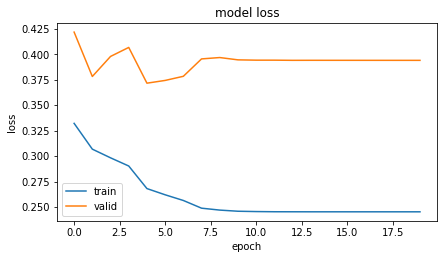

In [44]:
plt.figure(1,figsize = (15,8))

plt.subplot(222)
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','valid'])

plt.show()

In [45]:
model.load_weights('weights.h5')

In [46]:
pred_y = model.predict_generator(test_gen,
                                 steps=test_gen.n/test_gen.batch_size,
                                 verbose = True)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


698/698 [==============================] - 400s 573ms/step


In [47]:
test_gen.reset()
test_x,test_y = next(test_gen)
seed = np.random.randint(16, size=1)

print(f'Image Index: {seed}')
print(f'Disease Vector: {test_y[seed[0]]}')
print(f'Predicted Disease Vector: {pred_y[seed[0]]}')

Image Index: [13]
Disease Vector: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Predicted Disease Vector: [0.5803274  0.0484749  0.03957199 0.09208037 0.02446036 0.0080434
 0.00976142 0.00746058 0.06799705 0.00236261 0.02432836 0.00836076
 0.04685343 0.72568744]


In [48]:
from sklearn.metrics import roc_curve, auc

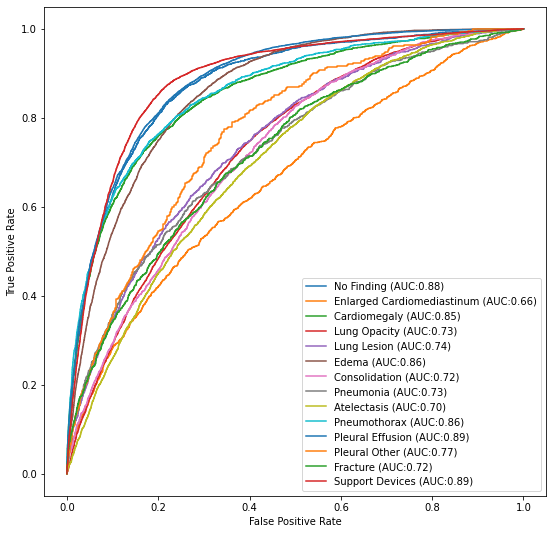

In [49]:
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(classes):
    #Points to graph
    fpr, tpr, thresholds = roc_curve(test_gen.labels[:,idx].astype(int), pred_y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    
#convention
c_ax.legend()

#Labels
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

# Save as a png
fig.savefig('AUC_densenet.png')

In [50]:
auc = roc_auc_score(test_gen.labels, pred_y)
print('ROC AUC: %f' % auc)

ROC AUC: 0.785831


In [51]:
test_loss = model.evaluate_generator(test_gen)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [52]:
print(f'Testing loss: {test_loss}')

Testing loss: 0.2782517373561859


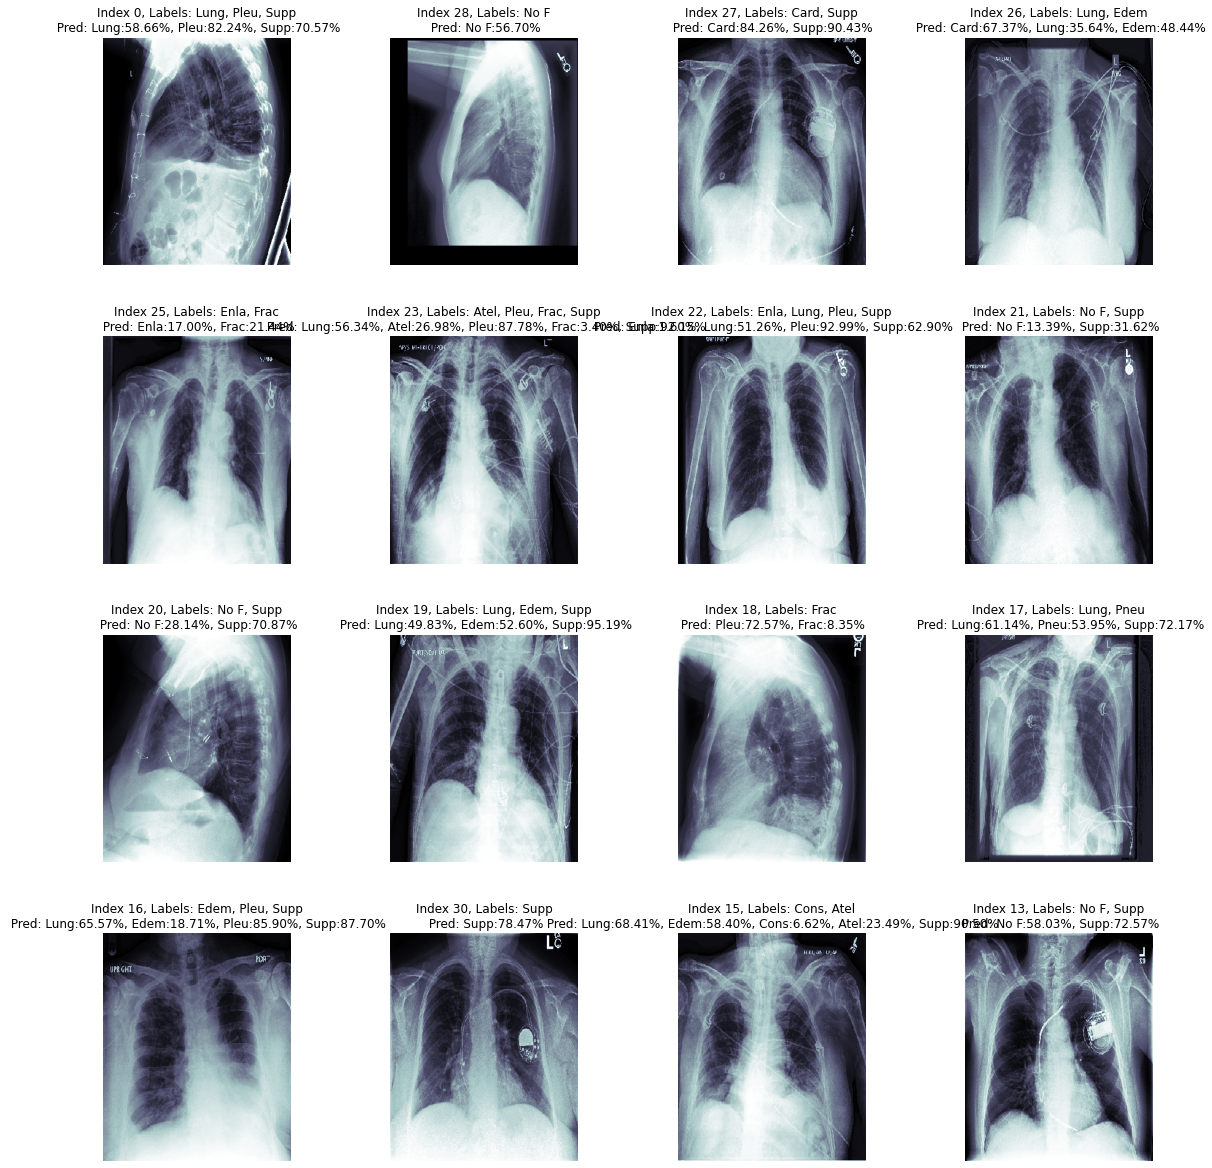

In [53]:
sickest_idx = np.argsort(np.sum(test_y, 1)<1)

#Space of images
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))

# Padding
fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
counter = 0

for (idx, c_ax) in zip(sickest_idx, m_axs.flatten()):
    
    # Image show
    c_ax.imshow(test_x[idx, :,:,0], cmap = 'bone')
    
    stat_str = [n_class[:4] for n_class, n_score in zip(classes, test_y[idx]) if n_score>0.5]
        
    # Building the labels
    pred_str = [f'{n_class[:4]}:{p_score*100:.2f}%'
                for n_class, n_score, p_score 
                in zip(classes,test_y[idx],pred_y[idx]) 
                if (n_score>0.5) or (p_score>0.5)]
    
    c_ax.set_title(f'Index {idx}, Labels: '+', '.join(stat_str)+'\n Pred: '+', '.join(pred_str))
    c_ax.axis('off')
fig.savefig('trained_img_predictions.png')
